In [469]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import os
from scipy.interpolate import CubicSpline
import seaborn as sns
import datetime as dt
import matplotlib.ticker as ticker

sns.set_theme(font_scale=1.3, style="ticks", palette=None, rc={'figure.dpi': 150})

In [591]:
filepath = '/Users/pietrocaprioglio/Library/CloudStorage/Dropbox/Oxford_PROJECTS/Python_scripts/perovskite_cleaned_dataframe.csv'

savepath = '/Users/pietrocaprioglio/Library/CloudStorage/Dropbox/Oxford_PROJECTS/Python_scripts/'

In [592]:
df_filtered = pd.read_csv(filepath)

/var/folders/r6/9zxzvdfj4bd1nq9d_vmy3mgw0000gn/T/ipykernel_98221/3658267824.py:1: DtypeWarning: Columns (23,65,68,94,97,146,167,168) have mixed types. Specify dtype option on import or set low_memory=False.
  df_filtered = pd.read_csv(filepath)


In [593]:
df_filtered['Ref_publication_date'] = pd.to_datetime(df_filtered['Ref_publication_date'], format = "%Y/%m/%d")

In [594]:
df_filtered = df_filtered.sort_values('Ref_publication_date')
#

In [589]:
df_filtered = df.loc[df['Cell_architecture'].isin(['pin','nip'])]
# df_filtered = df.loc[df['Ref_lead_author'] == 'Snaith et al.']

In [356]:
# df_filtered['Perovskite_band_gap'] = df_filtered['Perovskite_band_gap'].astype(float)

In [318]:
# df_filtered['year'] = pd.DatetimeIndex(df_filtered['Ref_publication_date']).year

In [369]:
# df_filtered['Approx_band_gap'] = np.round(df_filtered['Perovskite_band_gap'],1)

In [331]:
# df_filtered['Perovskite_band_gap'] = df_filtered['Perovskite_band_gap'].replace('NaN', '0')

In [390]:
# df = df.sort_values('Ref_publication_date')


In [147]:
# for ETL in df_filtered['ETL_stack_sequence']:
#     if 'PCBM' in ETL:
#         df_filtered['Fullerene'] = 'Yes'
#     else: 
#         df_filtered['Fullerene'] = 'No'    

In [381]:
# df_filtered.to_csv(savepath + '/perovskite_cleaned_dataframe.csv')

In [236]:
# df_filtered['JV_certified_values'].unique()

array([ True])

<Figure size 3750x5250 with 0 Axes>

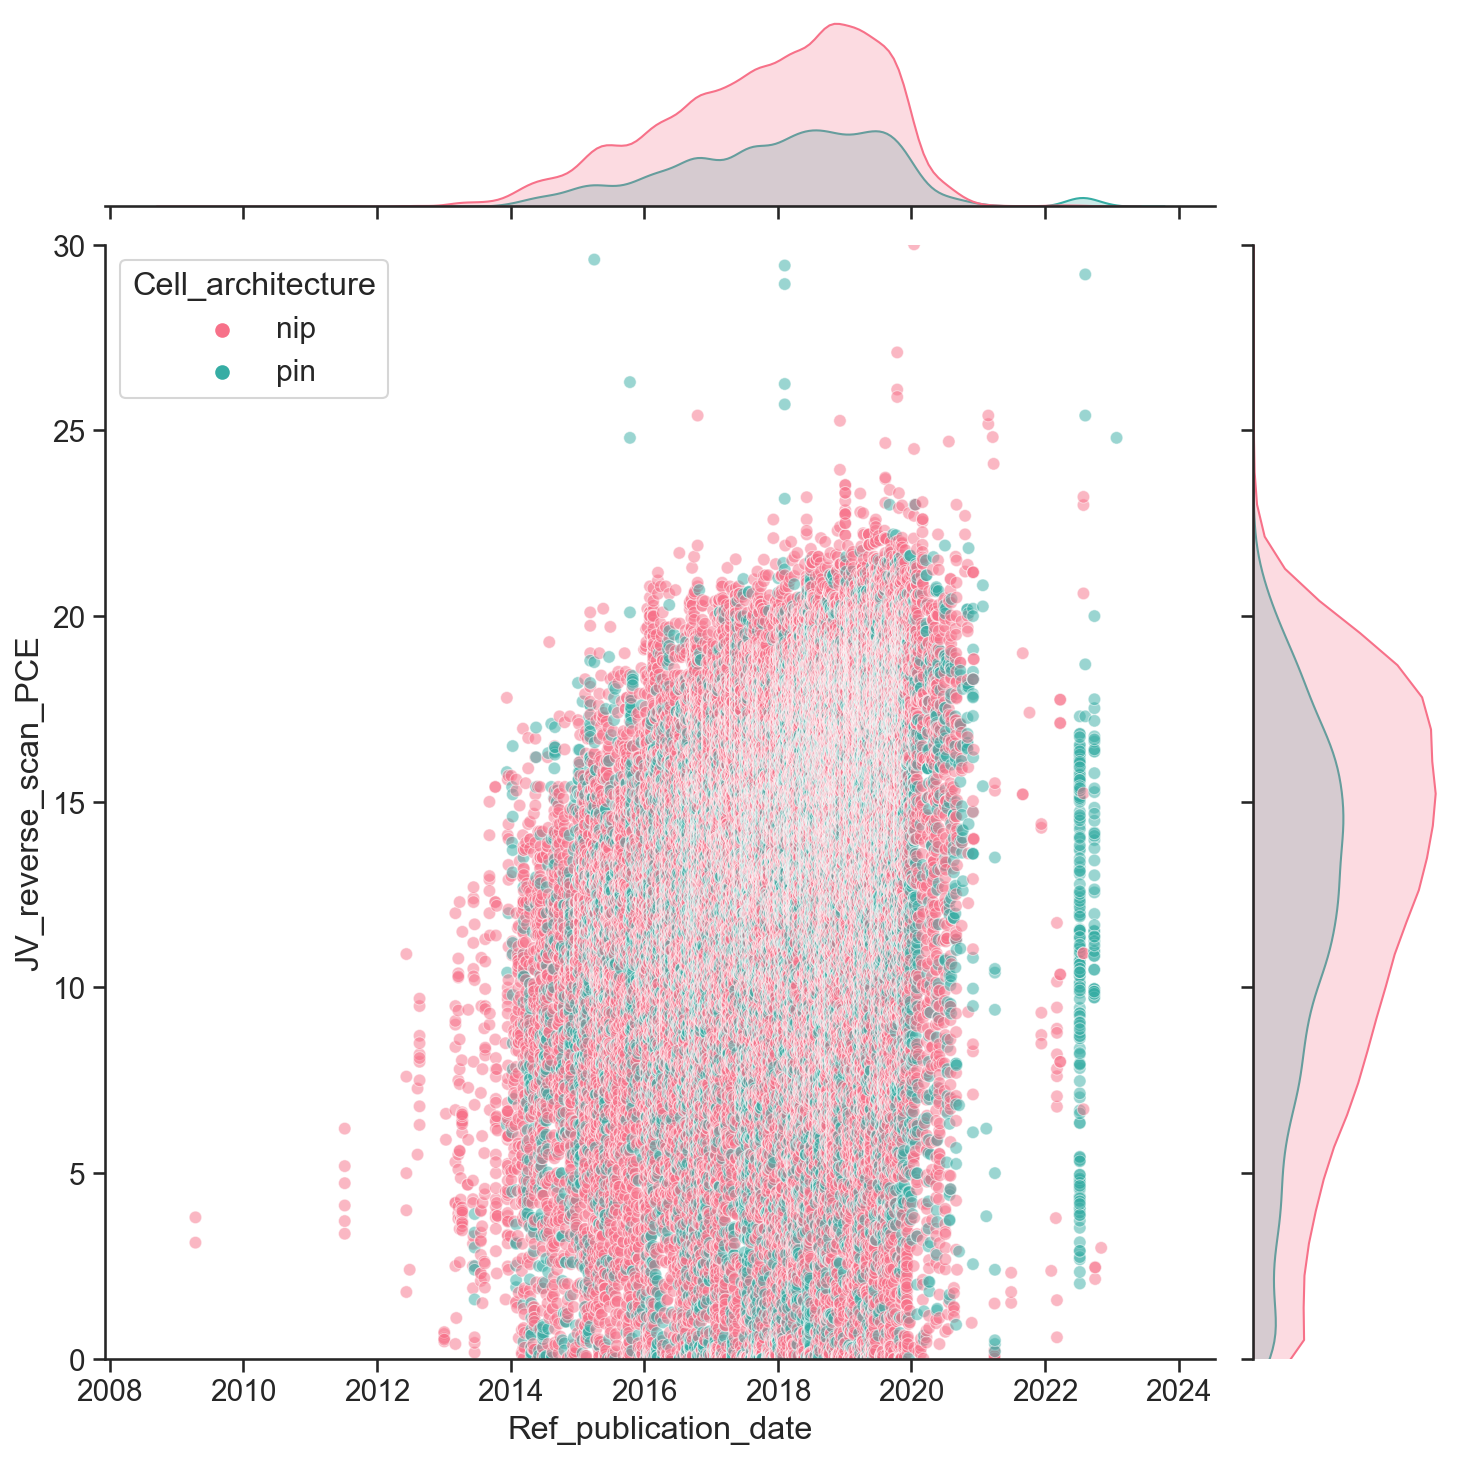

In [595]:

fig = plt.figure(figsize=(25, 35))
fig.patch.set_facecolor('white')

plot = sns.jointplot(data=df_filtered, y='JV_reverse_scan_PCE', x='Ref_publication_date', hue='Cell_architecture', 
                     palette='husl',
                     alpha=0.5, ylim=(0, 30), height=10)

# plt.xticks(rotation=90);
# plot.st_ylim([0, 30]);
# plot.xaxis.set_major_locator(ticker.MaxNLocator(25))

In [439]:
len(df_filtered['ETL_stack_sequence'].unique())

1438

<Figure size 3750x5250 with 0 Axes>

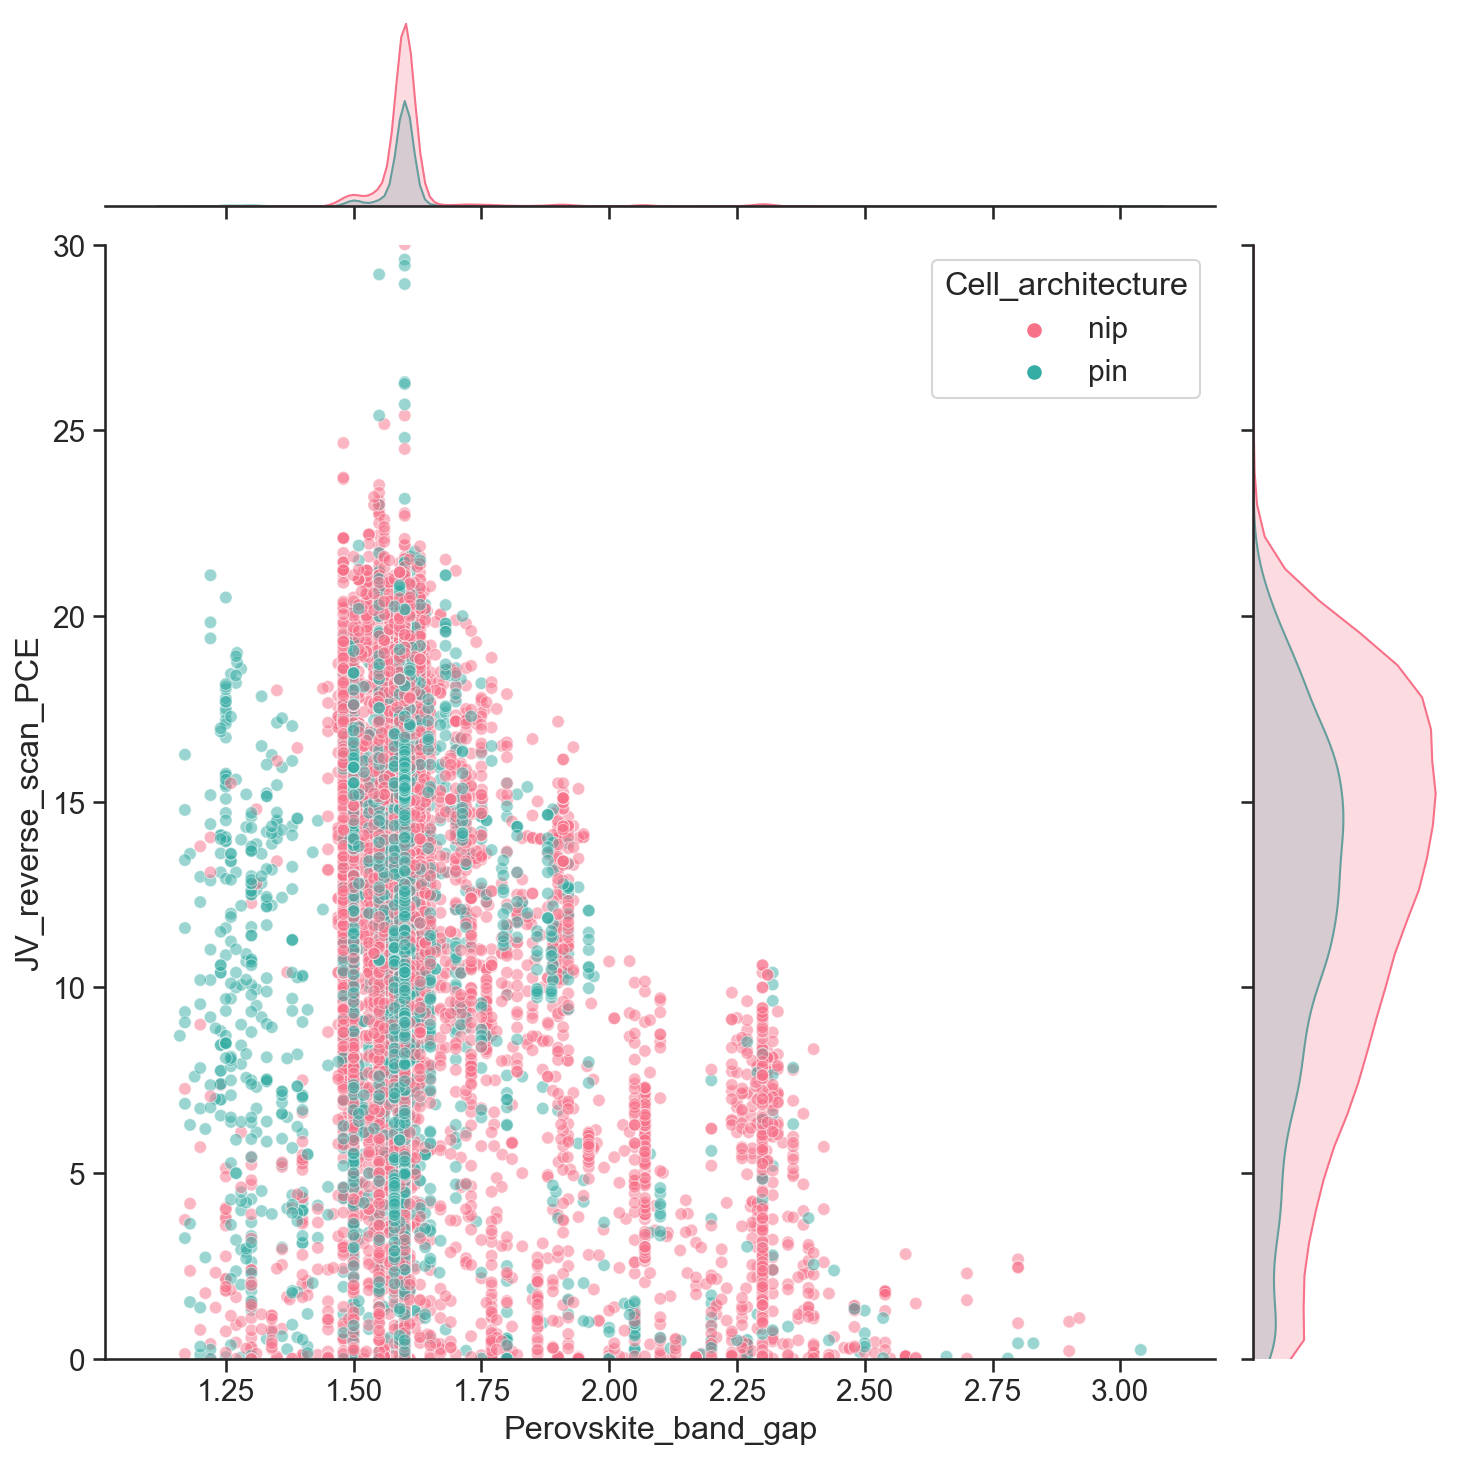

In [471]:
fig = plt.figure(figsize=(25, 35))
fig.patch.set_facecolor('white')

plot = sns.jointplot(data=df_filtered, y='JV_reverse_scan_PCE', x='Perovskite_band_gap', hue='Cell_architecture', 
                     palette='husl',legend='brief',
                     alpha=0.5, ylim=(0, 30), height=10)

<Figure size 7500x10500 with 0 Axes>

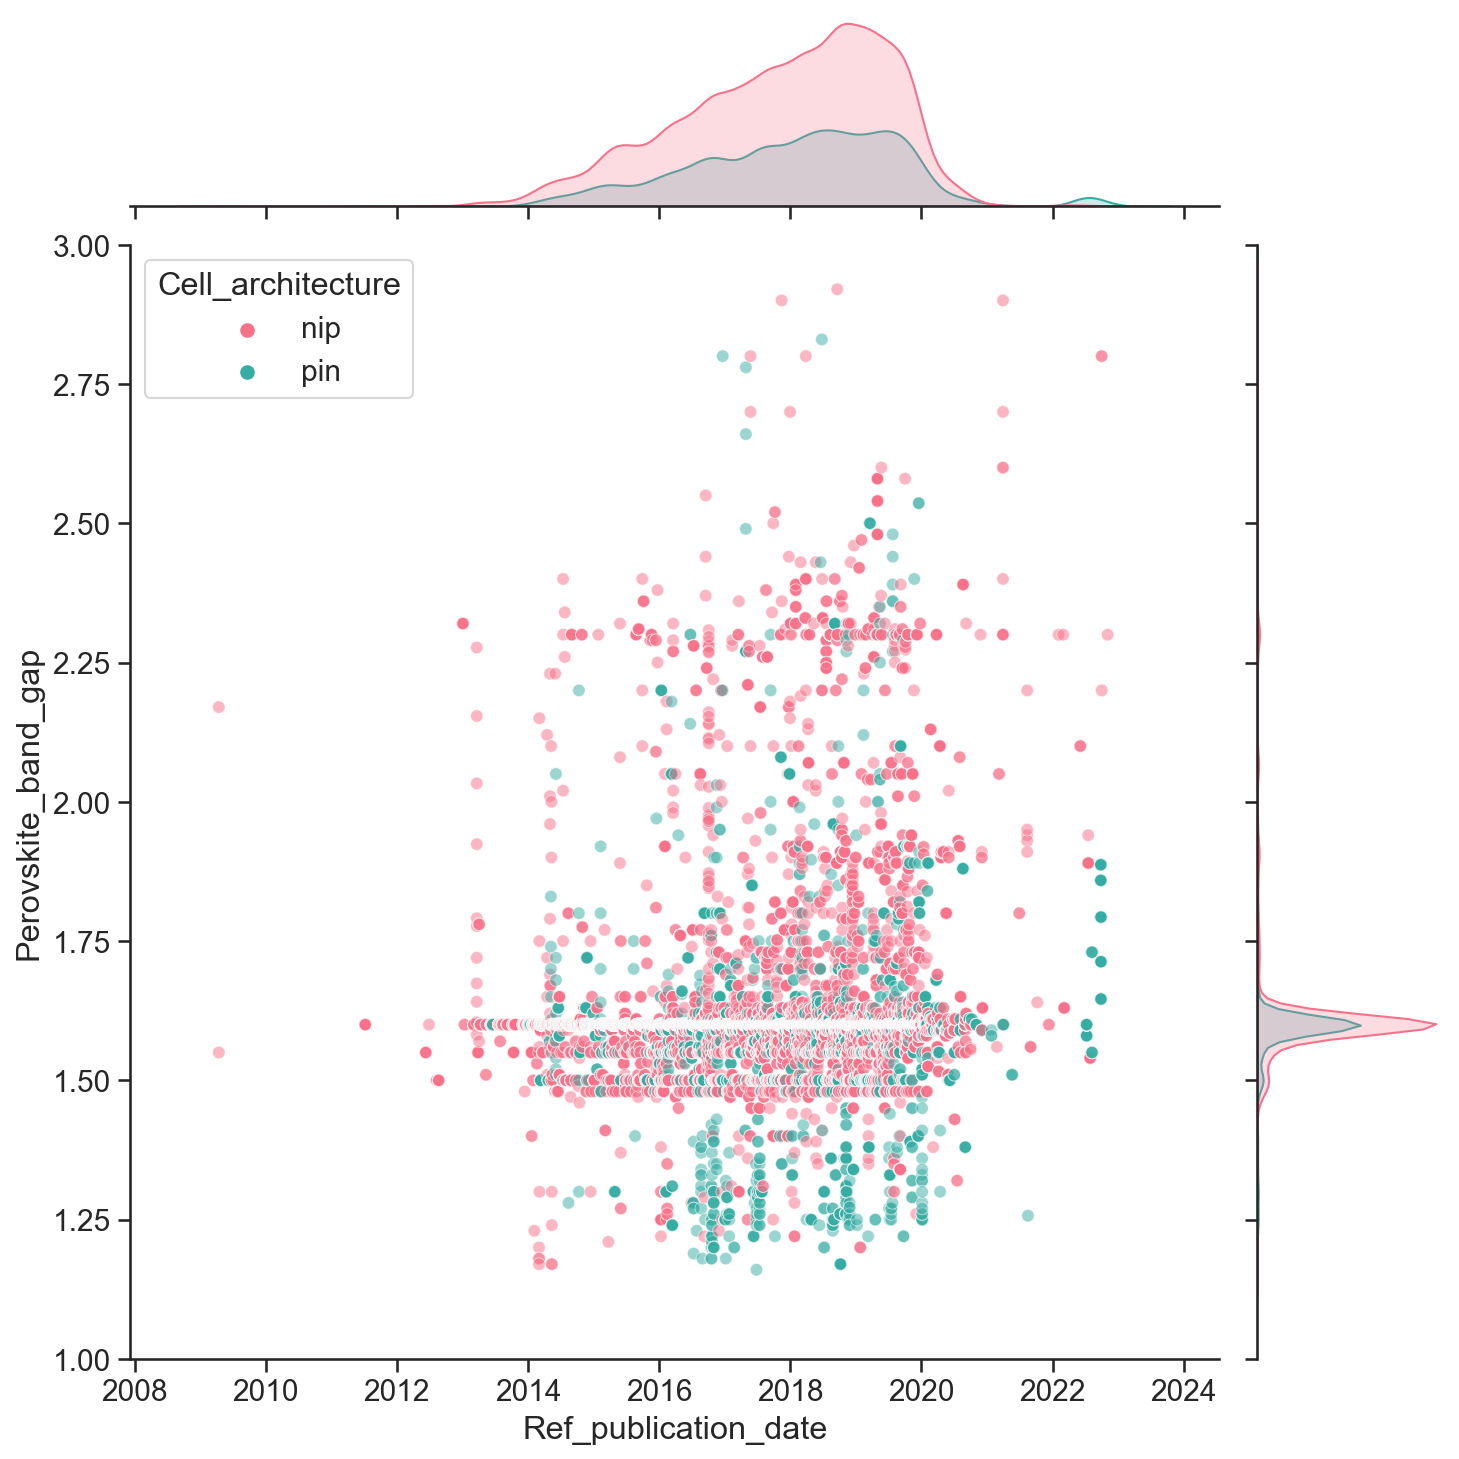

In [472]:
fig = plt.figure(figsize=(25, 35), dpi=300)
fig.patch.set_facecolor('white')

plot = sns.jointplot(data=df_filtered, y='Perovskite_band_gap', x='Ref_publication_date', hue='Cell_architecture', 
                     palette='husl',
                     alpha=0.5, ylim=(1, 3), height=10)

<Figure size 3750x5250 with 0 Axes>

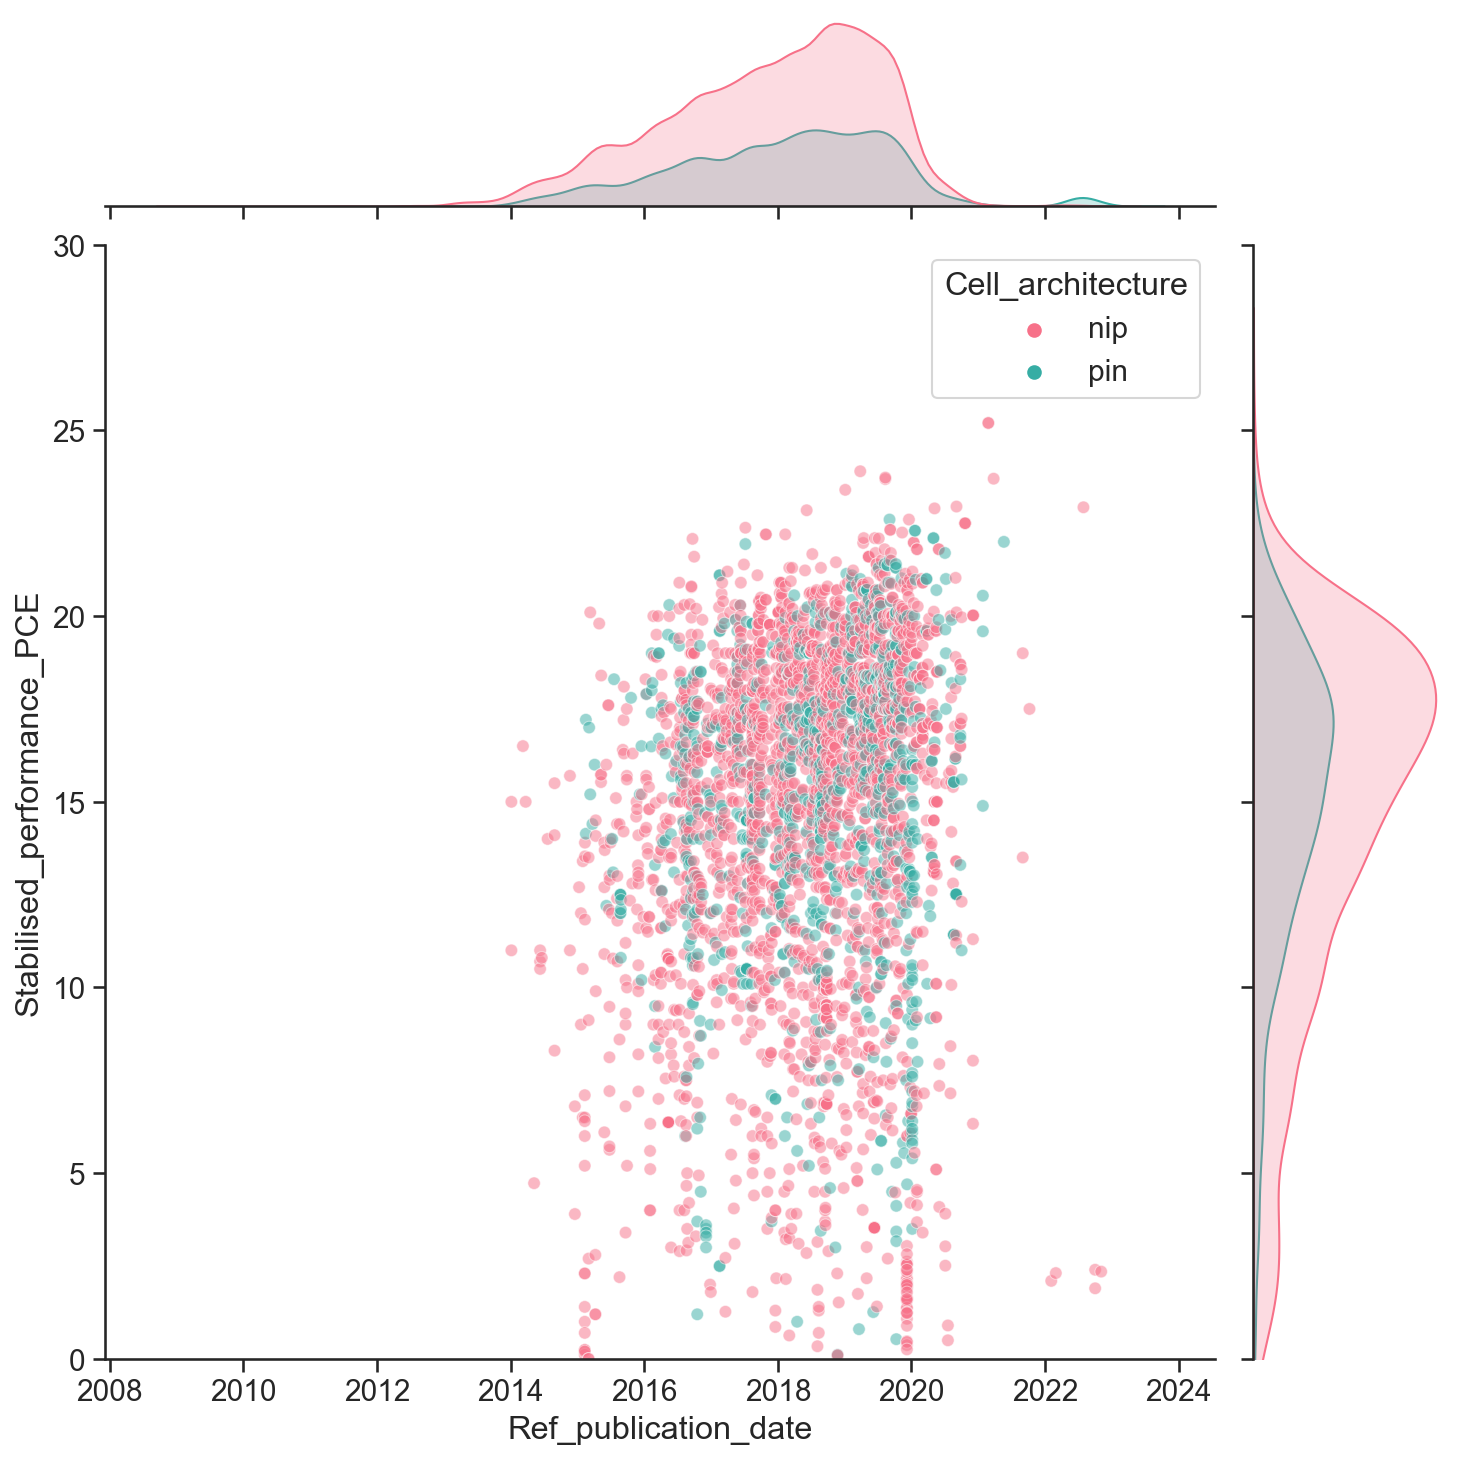

In [473]:
fig = plt.figure(figsize=(25, 35))
fig.patch.set_facecolor('white')

plot = sns.jointplot(data=df_filtered, y='Stabilised_performance_PCE', x='Ref_publication_date', hue='Cell_architecture',
                     palette='husl',
                     alpha=0.5, ylim=(0, 30), height=10)

In [395]:
sum(df_filtered['Stabilised_performance_measured'] == True) / len(df_filtered) * 100

8.052154406953921

In [355]:
# df_filtered['Perovskite_band_gap'].loc[df_filtered['Perovskite_band_gap']==0] = 'NaN'

/var/folders/r6/9zxzvdfj4bd1nq9d_vmy3mgw0000gn/T/ipykernel_98221/2744104767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Perovskite_band_gap'].loc[df_filtered['Perovskite_band_gap']==0] = 'NaN'


<Figure size 3750x5250 with 0 Axes>

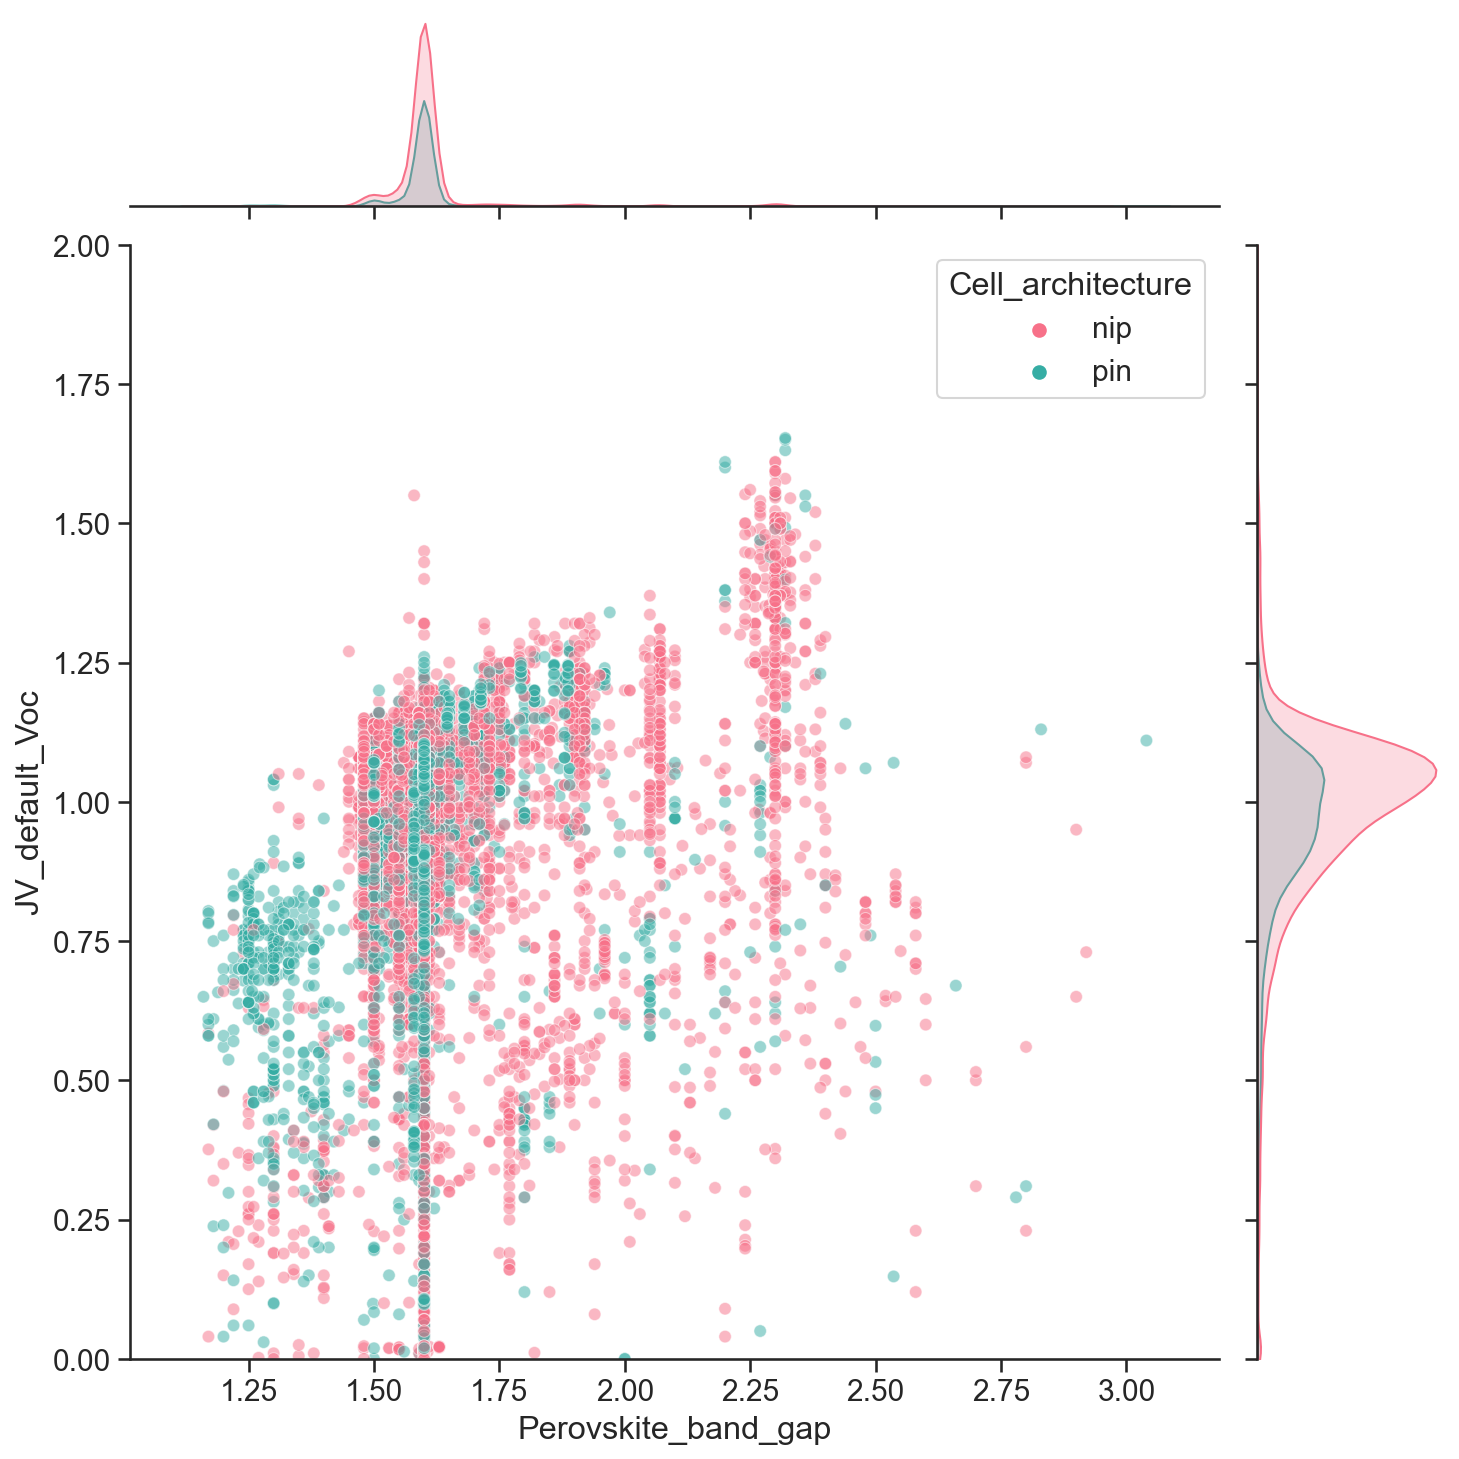

In [474]:
fig = plt.figure(figsize=(25, 35))
fig.patch.set_facecolor('white')

plot = sns.jointplot(data=df_filtered, y='JV_default_Voc', x='Perovskite_band_gap', hue='Cell_architecture', 
                     palette='husl',
                     alpha=0.5, ylim=(0, 2), height=10)

<Figure size 3750x5250 with 0 Axes>

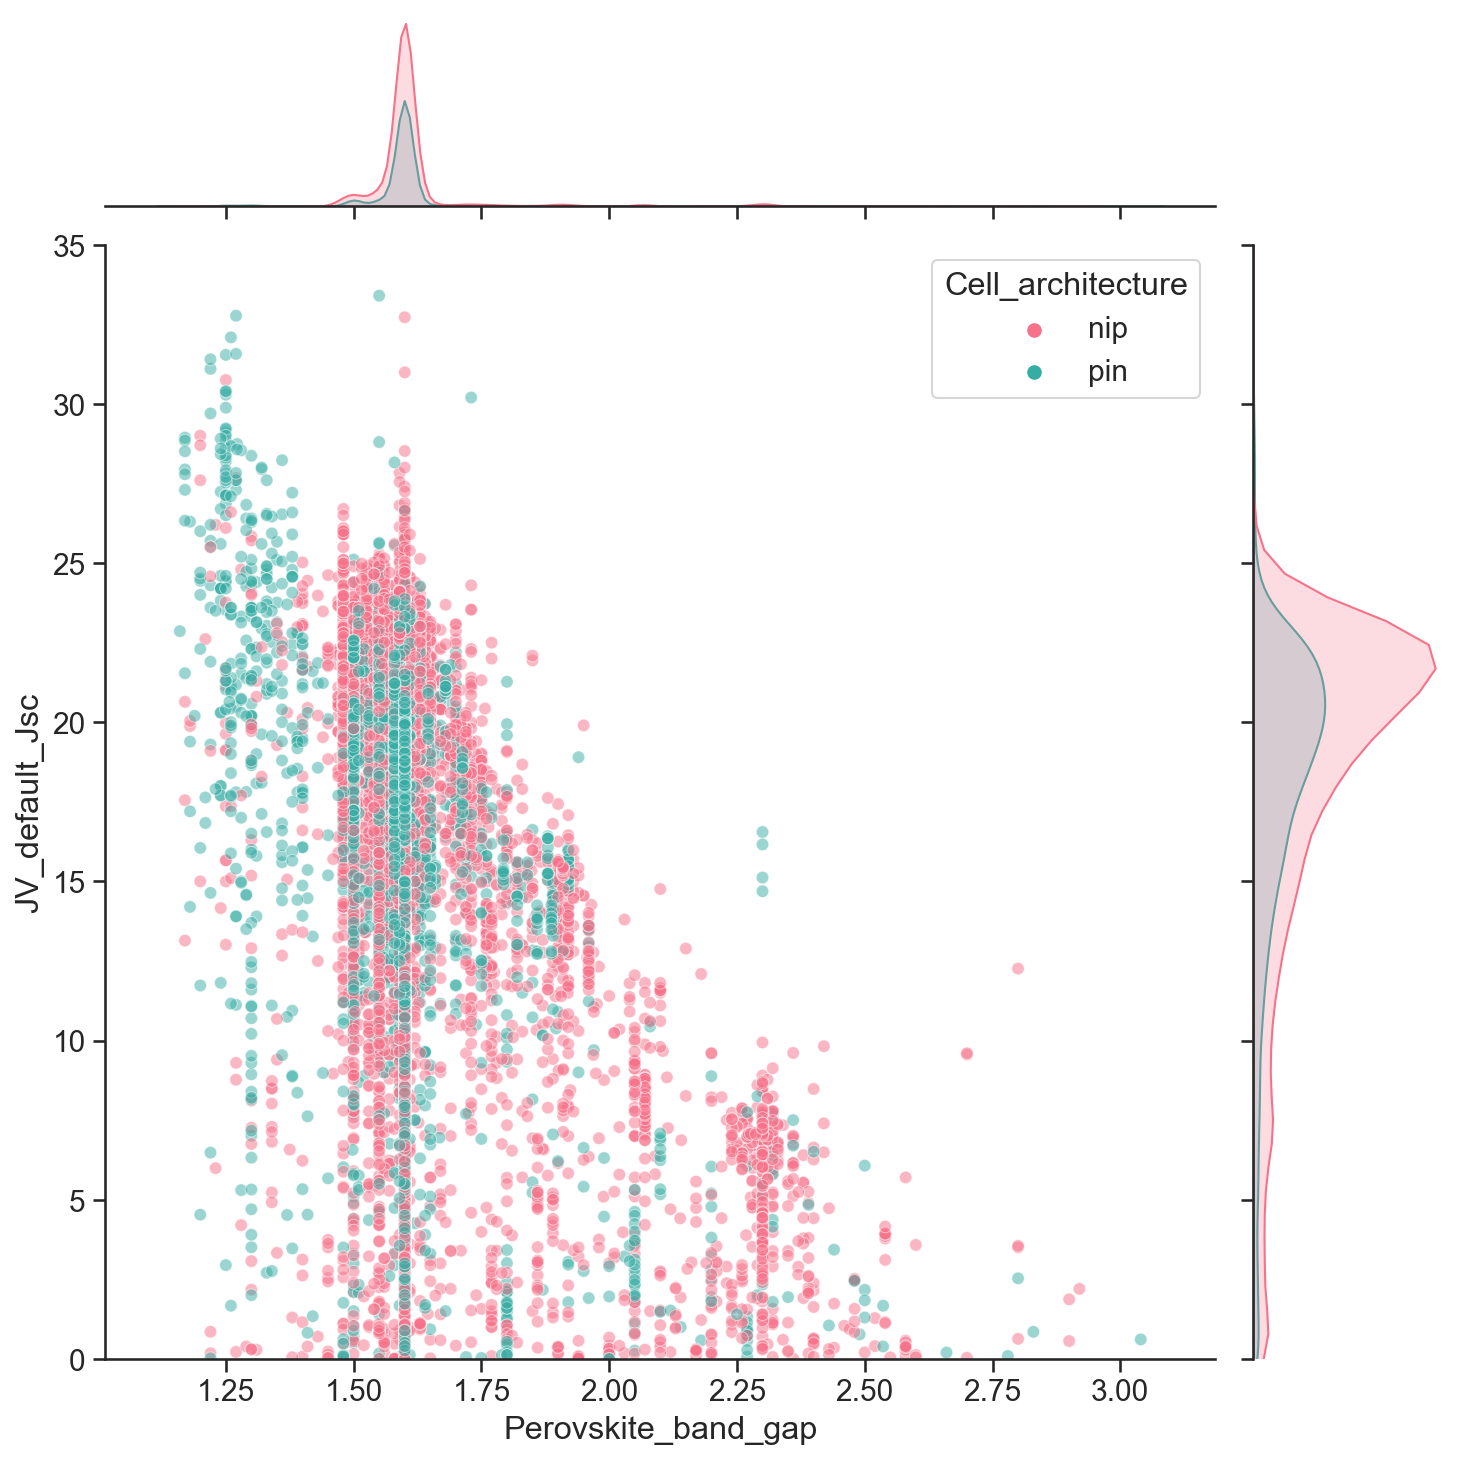

In [479]:
fig = plt.figure(figsize=(25, 35))
fig.patch.set_facecolor('white')

plot = sns.jointplot(data=df_filtered, y='JV_default_Jsc', x='Perovskite_band_gap', hue='Cell_architecture', 
                     palette='husl',
                     alpha=0.5, ylim=(0, 35), height=10)

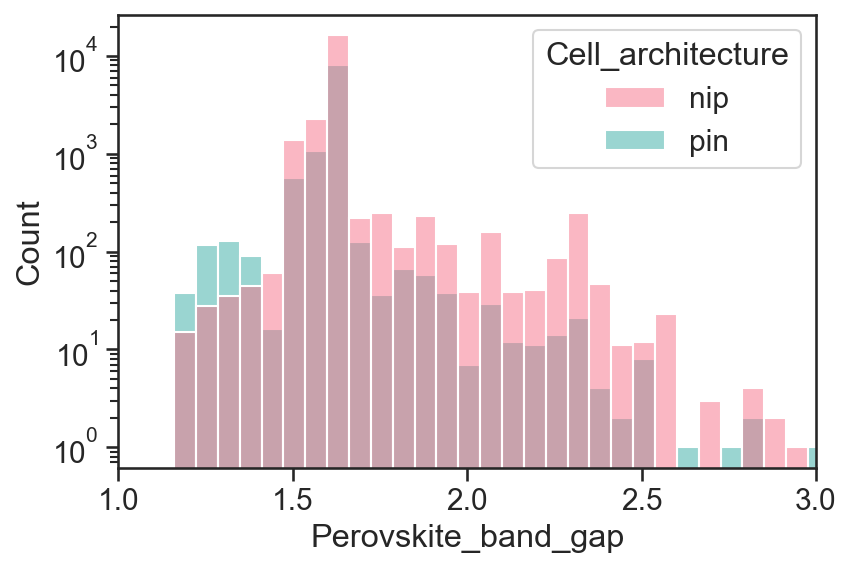

In [885]:
plot = sns.histplot(data=df, x=df['Perovskite_band_gap'], bins=30, hue='Cell_architecture', palette='husl')
plot.set_xlim([1, 3])
plot.set_yscale("log")  

/Users/pietrocaprioglio/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:461: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/Users/pietrocaprioglio/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:462: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


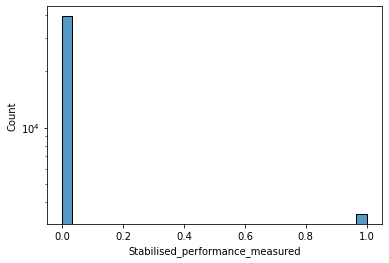

In [409]:
plot = sns.histplot(data=df['Stabilised_performance_measured'], bins=30)
# plot.set_xlim([1, 3])
plot.set_yscale("log") 

In [243]:
df_filtered2 = df_filtered.loc[lambda df_filtered: df_filtered['JV_certified_values'] == True]

<Figure size 3750x5250 with 0 Axes>

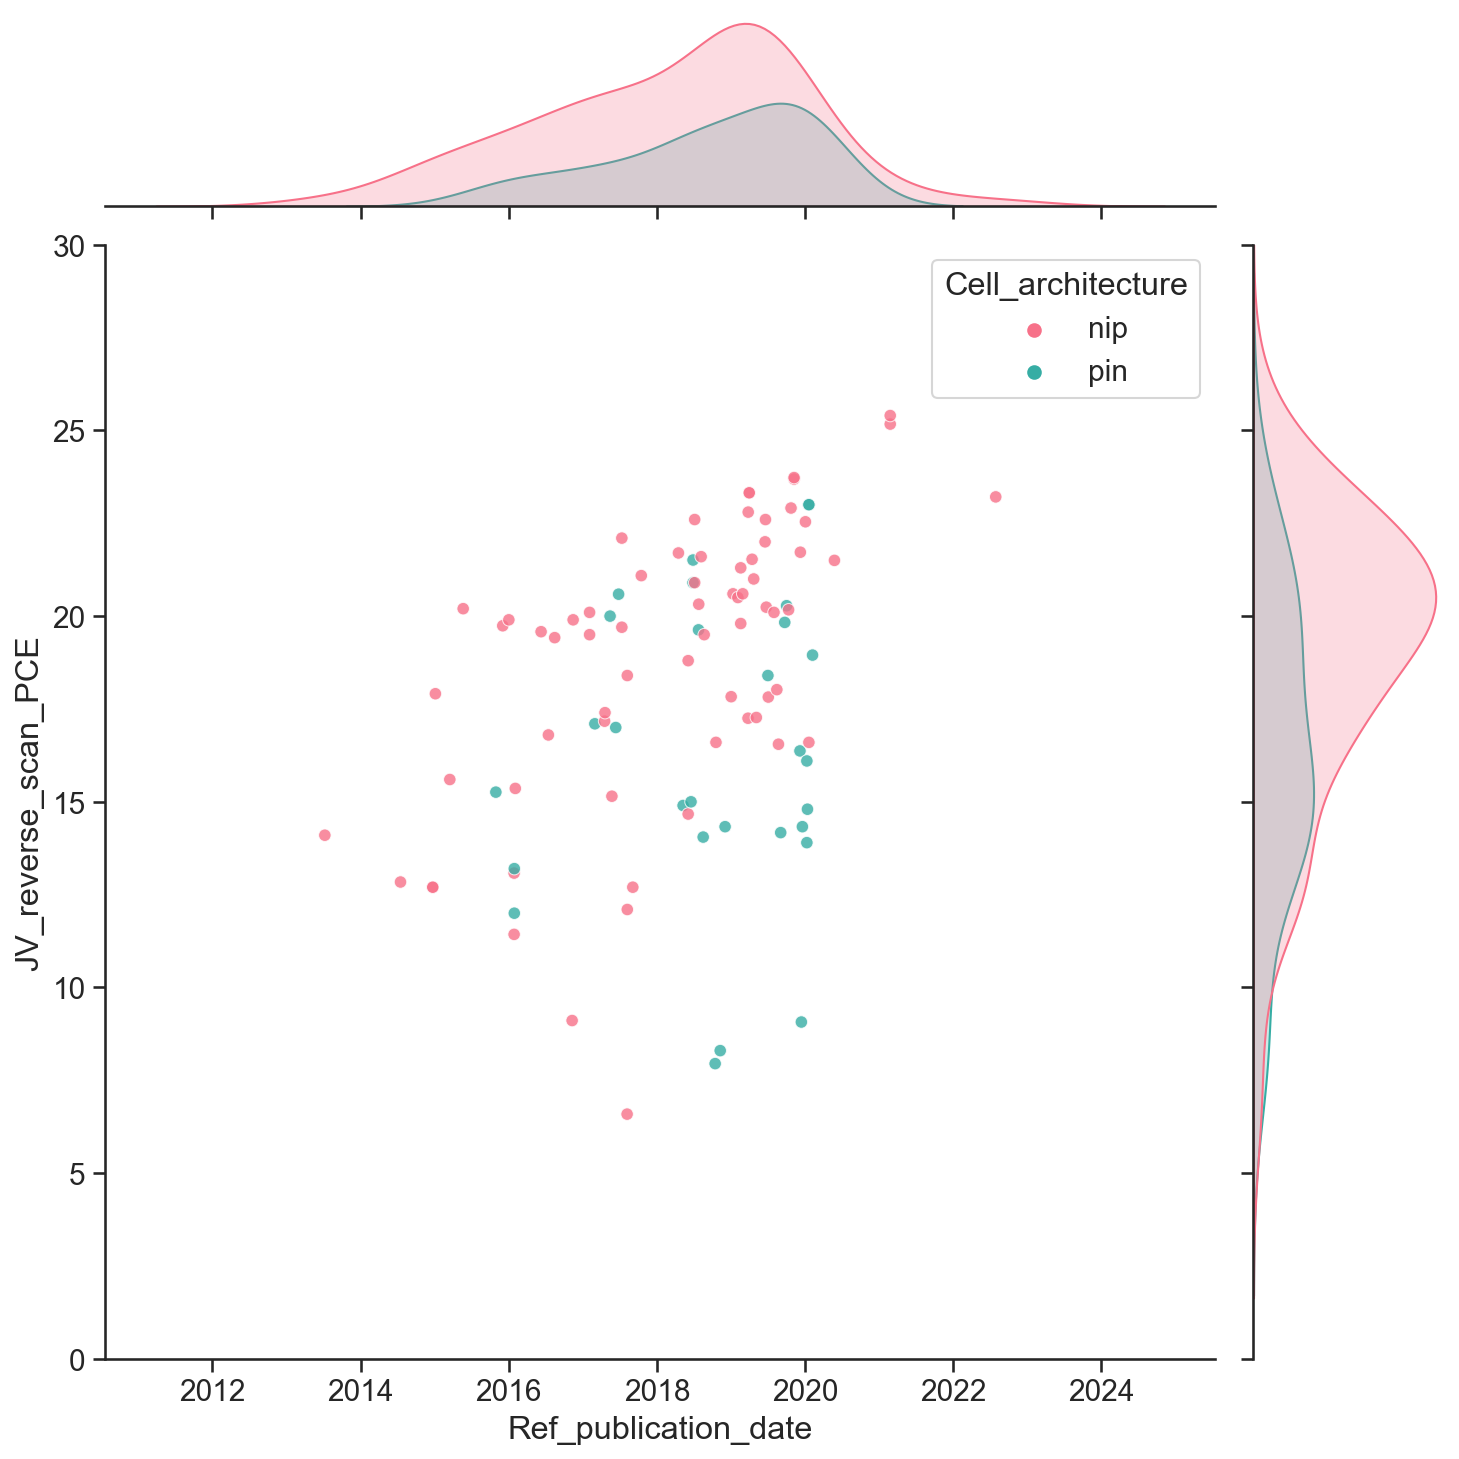

In [476]:
fig = plt.figure(figsize=(25, 35))
fig.patch.set_facecolor('white')

plot = sns.jointplot(data=df_filtered2, y='JV_reverse_scan_PCE', x='Ref_publication_date', hue='Cell_architecture', 
                     palette='husl',
                     alpha=0.8, ylim=(0, 30), height=10)

In [597]:
df_filtered_grouped = df_filtered


In [609]:
df_filtered_grouped['ETL_stack_sequence'].loc[df_filtered_grouped['ETL_stack_sequence'].str.contains('Ti')] = 'TiO2'

/var/folders/r6/9zxzvdfj4bd1nq9d_vmy3mgw0000gn/T/ipykernel_98221/2101748603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_grouped['ETL_stack_sequence'].loc[df_filtered_grouped['ETL_stack_sequence'].str.contains('Ti')] = 'TiO2'


In [611]:
df_filtered_grouped2 = df_filtered_grouped.loc[df_filtered_grouped['ETL_stack_sequence'].isin(['C60','TiO2','SnOx','NFA','PCBM','ICBA','ZnOx'])]

In [570]:
# df_filtered_grouped2 = df_filtered_grouped.loc[df_filtered_grouped['ETL_stack_sequence'].isin(['ICBA','PCBM','C60'])]

<Figure size 3750x5250 with 0 Axes>

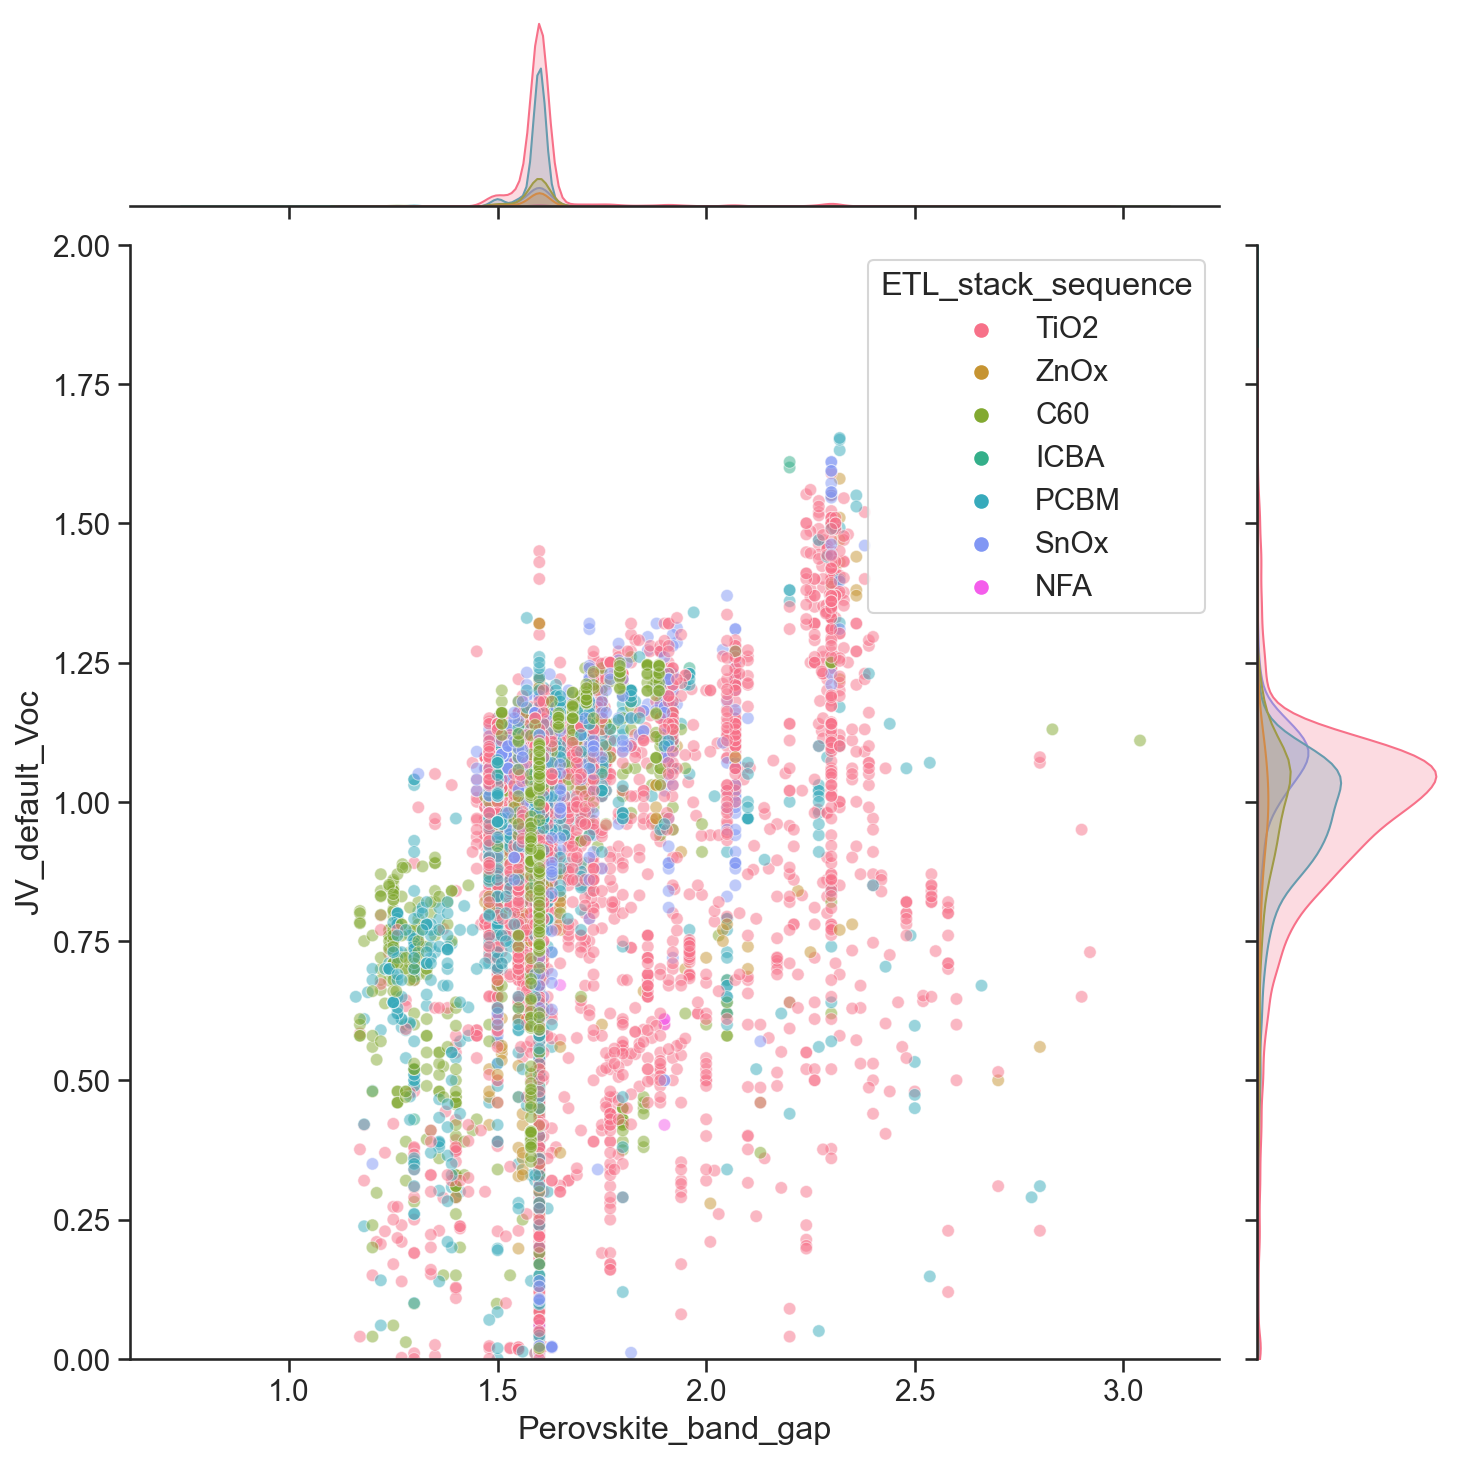

In [612]:
fig = plt.figure(figsize=(25, 35))
fig.patch.set_facecolor('white')

plot = sns.jointplot(data=df_filtered_grouped2, y='JV_default_Voc', x='Perovskite_band_gap', hue='ETL_stack_sequence', 
                     palette='husl',legend='full',
                     alpha=0.5, ylim=(0, 2), height=10)

In [610]:
df_filtered_grouped['ETL_stack_sequence'].unique()

array(['TiO2', 'AlOx', 'ZnOx', 'C60', 'ICBA', 'PCBM', 'none', 'Unknown',
       'Acetyl acetate; I2; LiI', 'F8BT',
       'Ethyl acetate; I2; LiI; TBP; Urea', 'AZO-c', 'CdSe-QDs', 'SnOx',
       'Cs2CO3', '3TPYMB', 'N2200', 'WOx', 'Carbon', 'PFN', 'PFN-OX',
       'Graphene', 'CdS', 'CdS-nw', 'PCTDI', 'FPI-PEIE', 'Zr(acac)4',
       'Ru(acac)', 'C70 | TmPyPB', 'C70', 'In2O3', 'P(NDI2OD-T2)',
       'P(NDI2DT-T2)', 'P(NDI2OD-TET)', 'IPB', 'PCBH', 'IPH', 'PCBB',
       'Nb2O5', 'PTEG-1', 'NFA', 'BiFeO3',
       '1‐benzyl‐3‐methylimidazolium chloride', 'QCAPZ | LiF', 'Fe2O3',
       'Ca', 'WO3', 'MgO | SrRuO3 | SrRuO3', 'IBF-Ep', 'BPB-M | LiF',
       'GaN', 'IPH | PFNBr', 'F16CuPc | Bphen', 'HATNA', 'C70 | LiF',
       'PCBCB', 'LiF', 'PNDI-2T | PEIE', 'CDIN', 'WO3-c',
       'WO3-c | WO3-nw', 'DMEC-60 | LiF', 'DMEC-70 | LiF', 'H-DIPBI',
       'B-DIPBI', 'C70 | BCP', 'PTCBI | BCP', 'PEIE', '[EMIM]PF6-IL',
       'Fulleropyrrolidinium Iodide', 'Aniline; rGO | CsCO3', 'Bi2S3',
       'CeO

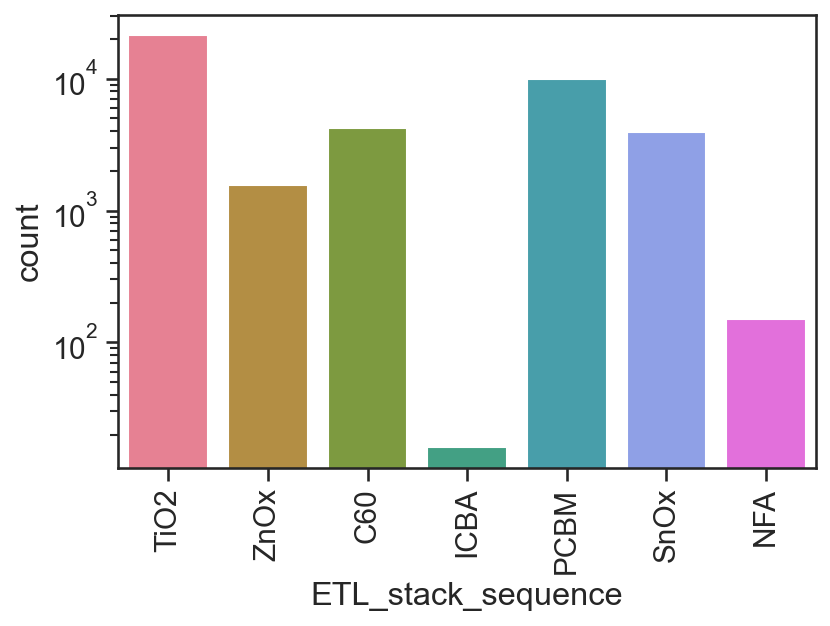

In [656]:
plot = sns.countplot(data=df_filtered_grouped2, x=df_filtered_grouped2['ETL_stack_sequence'],palette='husl')
plot.set_yscale("log")
plt.xticks(rotation=90)

ETL_list = ['TiO2', 'ZnOx','C60', 'ICBA', 'PCBM', 'SnOx', 'NFA']

In [614]:
df_filtered_grouped2.to_csv(savepath + '/perovskite_cleaned_dataframe_groupedETL.csv')

In [639]:
len(df_filtered_grouped2['HTL_stack_sequence'].unique())

1407

In [641]:
HTL_list = ['PTAA', 'PolyTPD','Spiro', 'P3HT', 'ZnOx', 'NiOx', 'PEDOT', 'SAM']

In [638]:
df_filtered_grouped2['HTL_stack_sequence'].loc[df_filtered_grouped2['HTL_stack_sequence'].str.contains('Spiro')] = 'Spiro'

/var/folders/r6/9zxzvdfj4bd1nq9d_vmy3mgw0000gn/T/ipykernel_98221/2449555168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_grouped2['HTL_stack_sequence'].loc[df_filtered_grouped2['HTL_stack_sequence'].str.contains('Spiro')] = 'Spiro'


In [643]:
df_filtered_grouped3 = df_filtered_grouped2.loc[df_filtered_grouped2['HTL_stack_sequence'].isin(HTL_list)]

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Spiro'),
  Text(1, 0, 'P3HT'),
  Text(2, 0, 'PTAA'),
  Text(3, 0, 'PEDOT'),
  Text(4, 0, 'PolyTPD'),
  Text(5, 0, 'NiOx'),
  Text(6, 0, 'SAM'),
  Text(7, 0, 'ZnOx')])

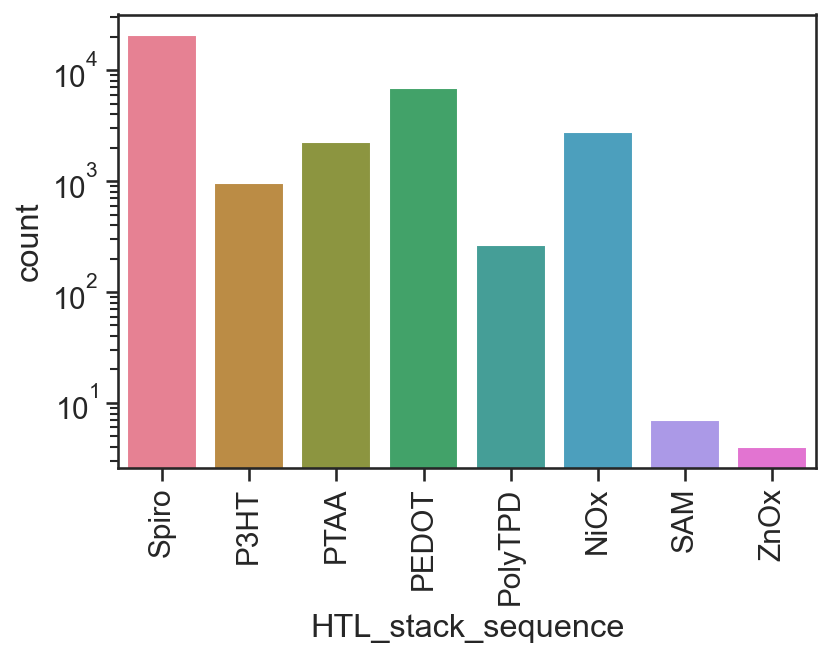

In [655]:
plot = sns.countplot(data=df_filtered_grouped3, x=df_filtered_grouped3['HTL_stack_sequence'], palette='husl')
plot.set_yscale("log") 
plt.xticks(rotation=90)

<Figure size 3750x5250 with 0 Axes>

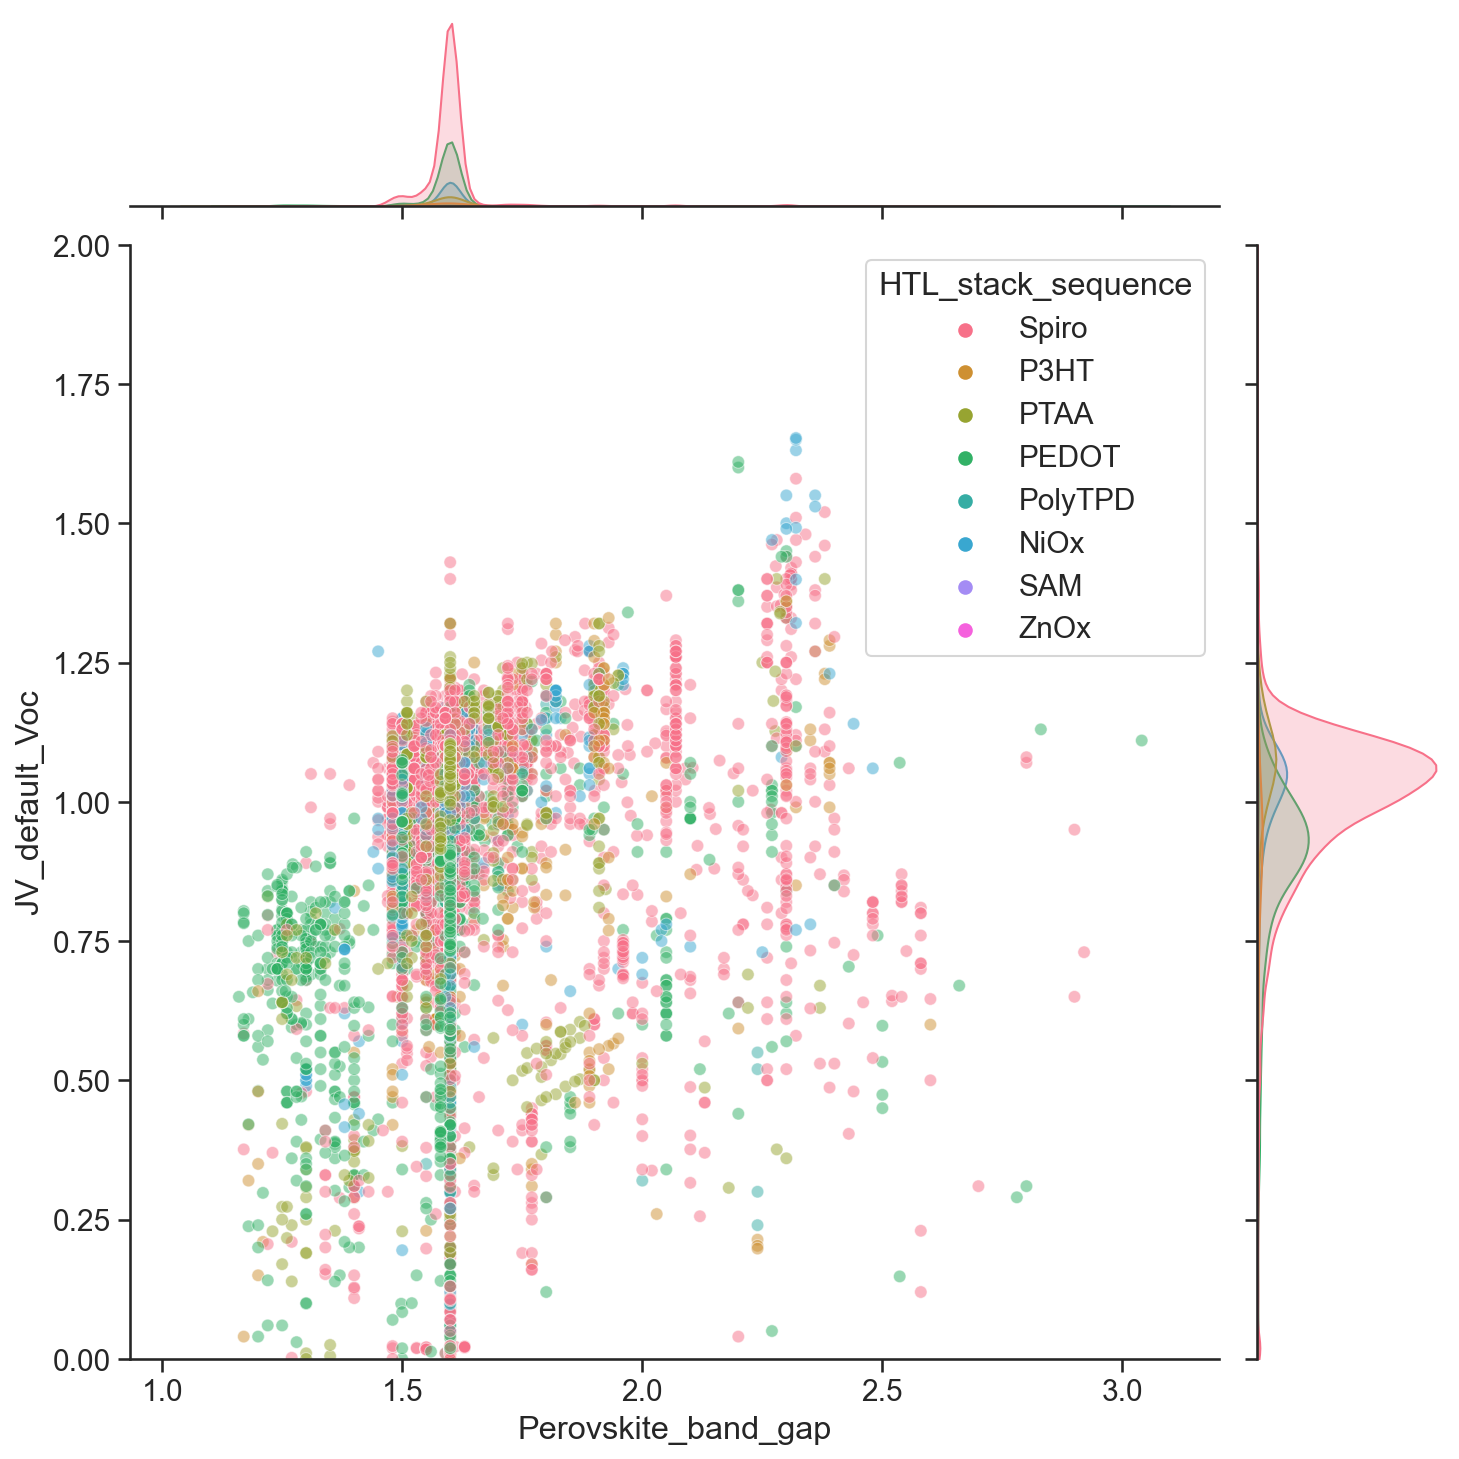

In [646]:
fig = plt.figure(figsize=(25, 35))
fig.patch.set_facecolor('white')

plot = sns.jointplot(data=df_filtered_grouped3, y='JV_default_Voc', x='Perovskite_band_gap', hue='HTL_stack_sequence', 
                     palette='husl',legend='full',
                     alpha=0.5, ylim=(0, 2), height=10)

In [651]:
len(df_filtered_grouped2)

41024

In [650]:
df_filtered_grouped2.to_csv(savepath + '/perovskite_cleaned_dataframe_grouped_CTL.csv')

In [690]:
df_filtered_grouped_Eg = df_filtered_grouped3.loc[df_filtered_grouped2['Approx_band_gap'].isin([1.6])]

In [691]:
df_filtered_grouped_Eg2 = df_filtered_grouped_Eg.loc[df_filtered_grouped_Eg['Cell_architecture'].isin(['pin'])]

In [693]:
len(df_filtered_grouped_Eg)

21891

<Figure size 3750x5250 with 0 Axes>

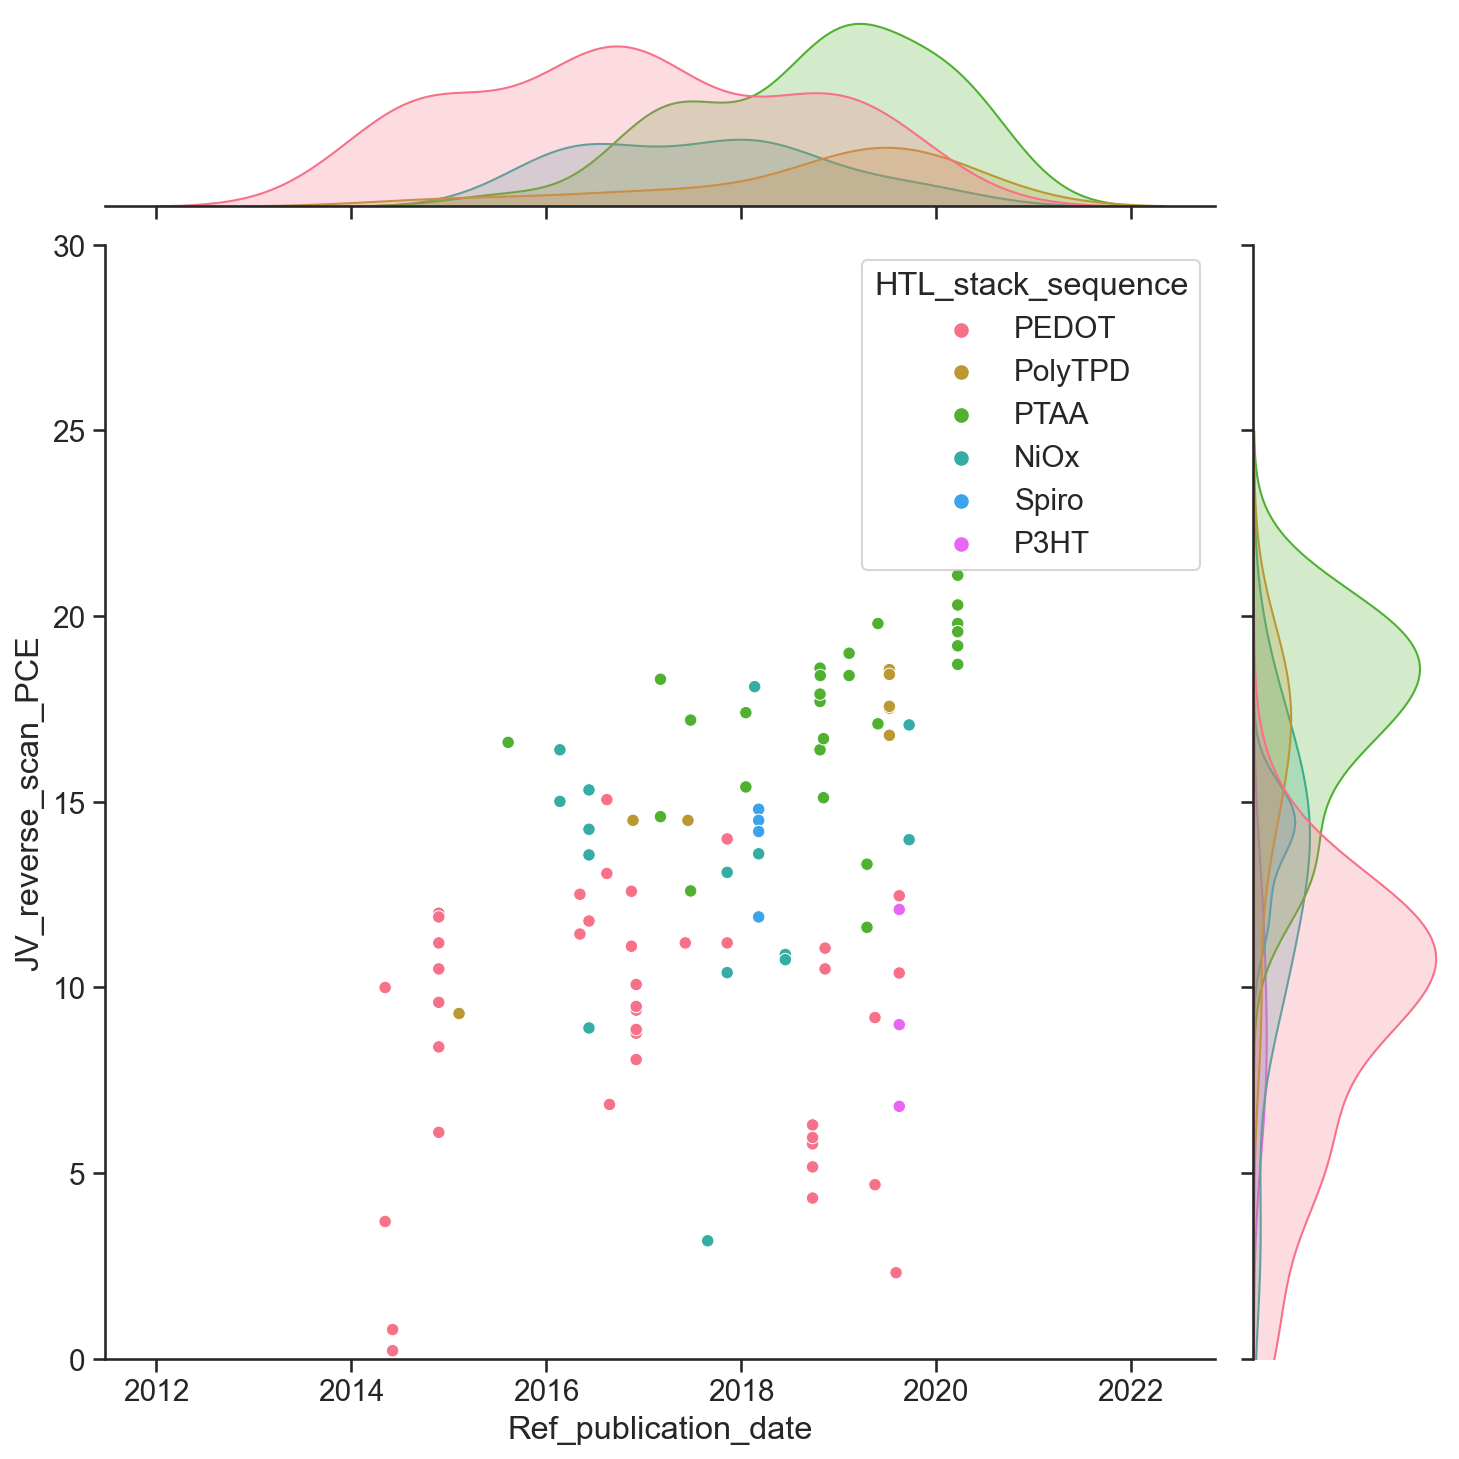

In [689]:
fig = plt.figure(figsize=(25, 35))
fig.patch.set_facecolor('white')

plot = sns.jointplot(data=df_filtered_grouped_Eg2, y='JV_reverse_scan_PCE', x='Ref_publication_date', hue='HTL_stack_sequence', 
                     palette='husl',
                     alpha=1, ylim=(0, 30), height=10)

In [702]:
len(df_filtered_grouped_Eg['HTL_stack_sequence'].unique())

8

In [703]:
df_filtered_grouped_Eg.to_csv(savepath + '/perovskite_cleaned_dataframe_filtered_16.csv')

In [704]:
df_filtered_grouped_Eg.head()

Unnamed: 0  Ref_ID  Ref_ID_temp Ref_name_of_person_entering_the_data  \
12       18294   18358        18358                  T. Jesper Jacobsson   
9        18292   18356        18356                  T. Jesper Jacobsson   
8        18293   18357        18357                  T. Jesper Jacobsson   
32        8545    8566         8566                         Elena Avilia   
33        8546    8567         8567                         Elena Avilia   

    Ref_data_entered_by_author                  Ref_DOI_number  \
12                       False         10.1126/science.1228604   
9                        False         10.1126/science.1228604   
8                        False         10.1126/science.1228604   
32                       False  10.1016/j.jpowsour.2013.11.053   
33                       False  10.1016/j.jpowsour.2013.11.053   

      Ref_lead_author Ref_publication_date               Ref_journal  \
12         Lee et al.           2012-06-10                   Science   
9          Lee et al.           2012-06-10                   Science   
8          Lee et al.           2012-06-10                   Science   
32  Di Giacomo et al.           2013-01-12  Journal of Power Sources   
33  Di Giacomo et al.           2013-01-12  Journal of Power Sources   

    Ref_part_of_initial_dataset  ... Stability_light_UV_filter  \
12                         True  ...                     False   
9                          True  ...                     False   
8                          True  ...                     False   
32                         True  ...                     False   
33                         True  ...                     False   

   Stability_potential_bias_load_condition Stability_potential_bias_range  \
12                                     NaN                       nan; nan   
9                                      NaN                       nan; nan   
8                                      NaN                       nan; nan   
32                                     NaN                       nan; nan   
33                                     NaN                       nan; nan   

   Stability_temperature_load_condition  Stability_temperature_range  \
12                                  NaN                     nan; nan   
9                                   NaN                     nan; nan   
8                                   NaN                     nan; nan   
32                                  NaN                     nan; nan   
33                                  NaN                     nan; nan   

    Stability_temperature_cycling_times  Stability_temperature_ramp_speed  \
12                              Unknown                               NaN   
9                               Unknown                               NaN   
8                               Unknown                               NaN   
32                              Unknown                               NaN   
33                              Unknown                               NaN   

   Stability_atmosphere  year  Approx_band_gap  
12              Unknown  2012              1.6  
9               Unknown  2012              1.6  
8               Unknown  2012              1.6  
32              Unknown  2013              1.6  
33              Unknown  2013              1.6  

[5 rows x 184 columns]

In [723]:
df_for_ML = df_filtered_grouped_Eg.loc[:, ~df_filtered_grouped_Eg.columns.str.contains("Ref")]

In [727]:
df_for_ML = df_for_ML.loc[:, ~df_for_ML.columns.str.contains("Unnamed")]

<AxesSubplot:>

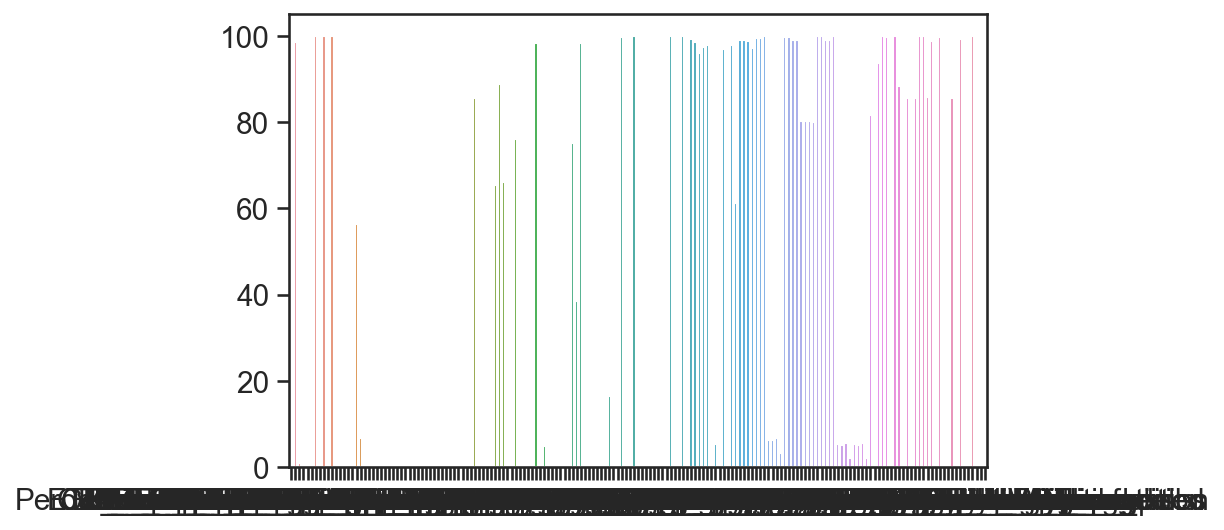

In [740]:
sns.barplot(y = np.sum(df_for_ML.isna()) / len(df_for_ML) * 100, x=df_for_ML.columns)

In [741]:
for column in df_for_ML.columns:
    
    if np.sum(df_for_ML[column].isna()) / len(df_for_ML) * 100 > 20:
        
        df_for_ML = df_for_ML.drop(column, axis=1)

<AxesSubplot:>

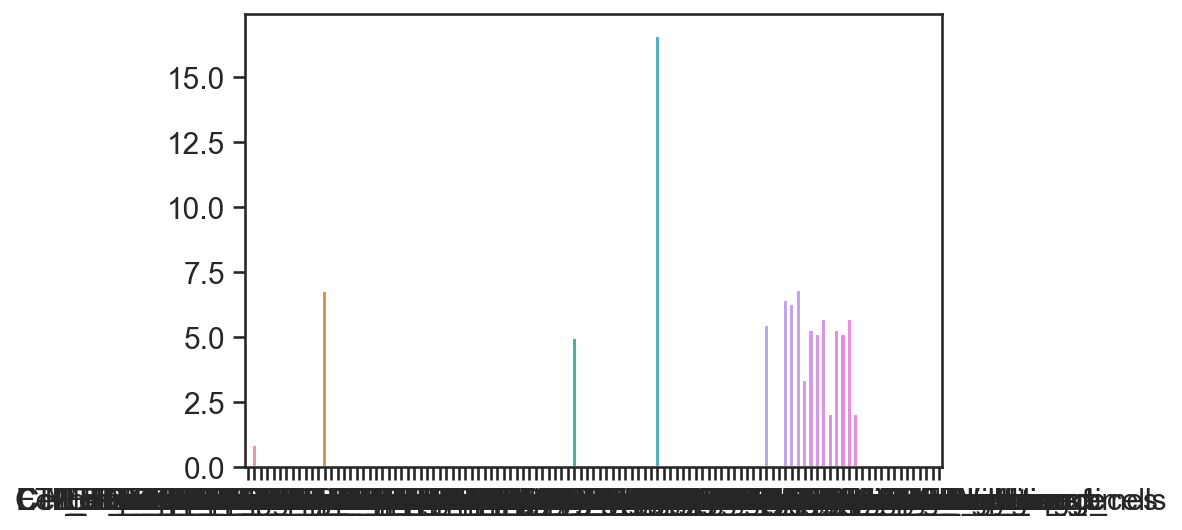

In [742]:
sns.barplot(y = np.sum(df_for_ML.isna()) / len(df_for_ML) * 100, x=df_for_ML.columns)

In [744]:

for column in df_for_ML.columns:
    
    if np.sum(df_for_ML[column].isna()) / len(df_for_ML) * 100 > 2.5:
        
        print(column)

ETL_additives_compounds
Perovskite_deposition_solvents_mixing_ratios
Backcontact_thickness_list
JV_light_spectra
JV_reverse_scan_Voc
JV_reverse_scan_Jsc
JV_reverse_scan_FF
JV_reverse_scan_PCE
JV_default_Voc
JV_default_Jsc
JV_default_FF
JV_default_Voc_scan_direction
JV_default_Jsc_scan_direction
JV_default_FF_scan_direction


In [748]:
df_for_ML_test = df_for_ML.replace('Unknown', np.nan)

<AxesSubplot:>

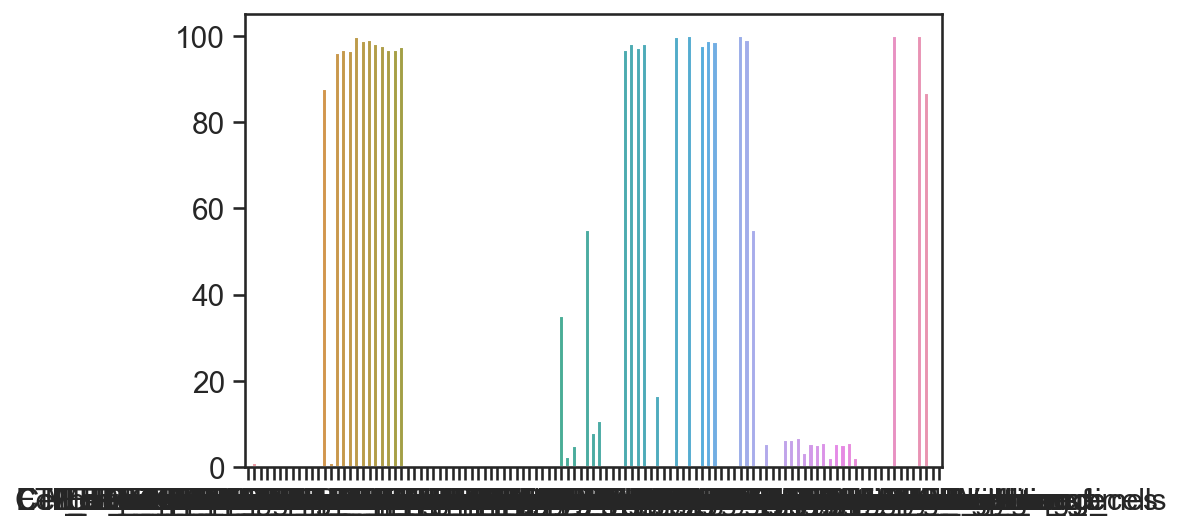

In [749]:
sns.barplot(y = np.sum(df_for_ML_test.isna()) / len(df_for_ML) * 100, x=df_for_ML_test.columns)

In [750]:
for column in df_for_ML_test.columns:
    
    if np.sum(df_for_ML_test[column].isna()) / len(df_for_ML) * 100 > 20:
        
        df_for_ML_test = df_for_ML_test.drop(column, axis=1)

<AxesSubplot:>

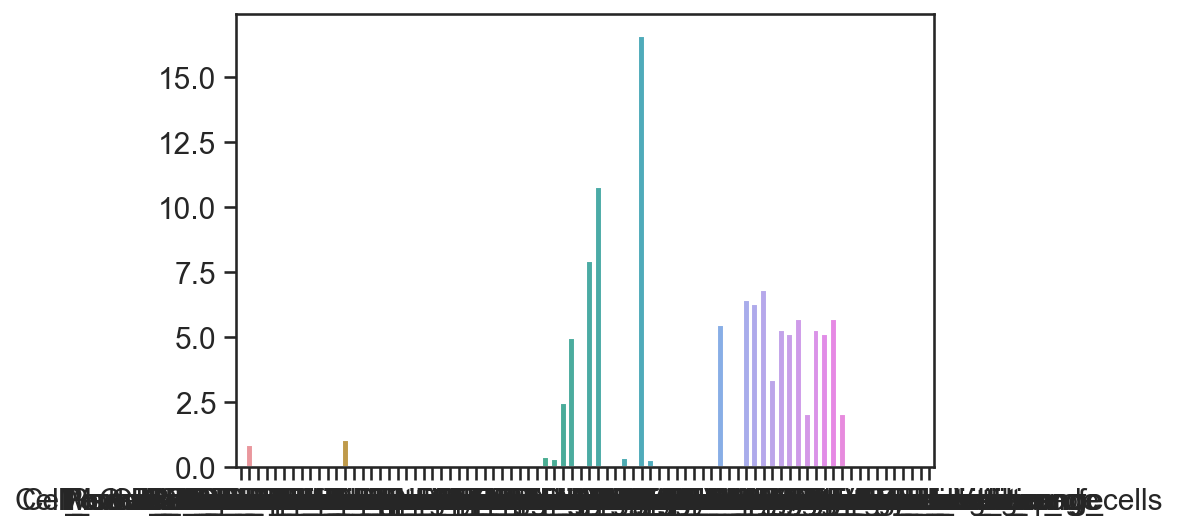

In [755]:
sns.barplot(y = np.sum(df_for_ML_test.isna()) / len(df_for_ML) * 100 , x=df_for_ML_test.columns)

In [752]:
len(df_for_ML_test.columns)

80

In [762]:
investigation_columns = []
investigation_values = []

for column in df_for_ML_test.columns:
    
    missing_value = np.sum(df_for_ML_test[column].isna()) / len(df_for_ML)
    
    if missing_value * 100 > 2.5:
        
        investigation_columns.append(column)
        investigation_values.append(missing_value * 100 )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Perovskite_deposition_solvents_mixing_ratios'),
  Text(1, 0, 'Perovskite_deposition_thermal_annealing_temperature'),
  Text(2, 0, 'Perovskite_deposition_thermal_annealing_time'),
  Text(3, 0, 'JV_light_spectra'),
  Text(4, 0, 'JV_reverse_scan_Voc'),
  Text(5, 0, 'JV_reverse_scan_Jsc'),
  Text(6, 0, 'JV_reverse_scan_FF'),
  Text(7, 0, 'JV_reverse_scan_PCE'),
  Text(8, 0, 'JV_default_Voc'),
  Text(9, 0, 'JV_default_Jsc'),
  Text(10, 0, 'JV_default_FF'),
  Text(11, 0, 'JV_default_Voc_scan_direction'),
  Text(12, 0, 'JV_default_Jsc_scan_direction'),
  Text(13, 0, 'JV_default_FF_scan_direction')])

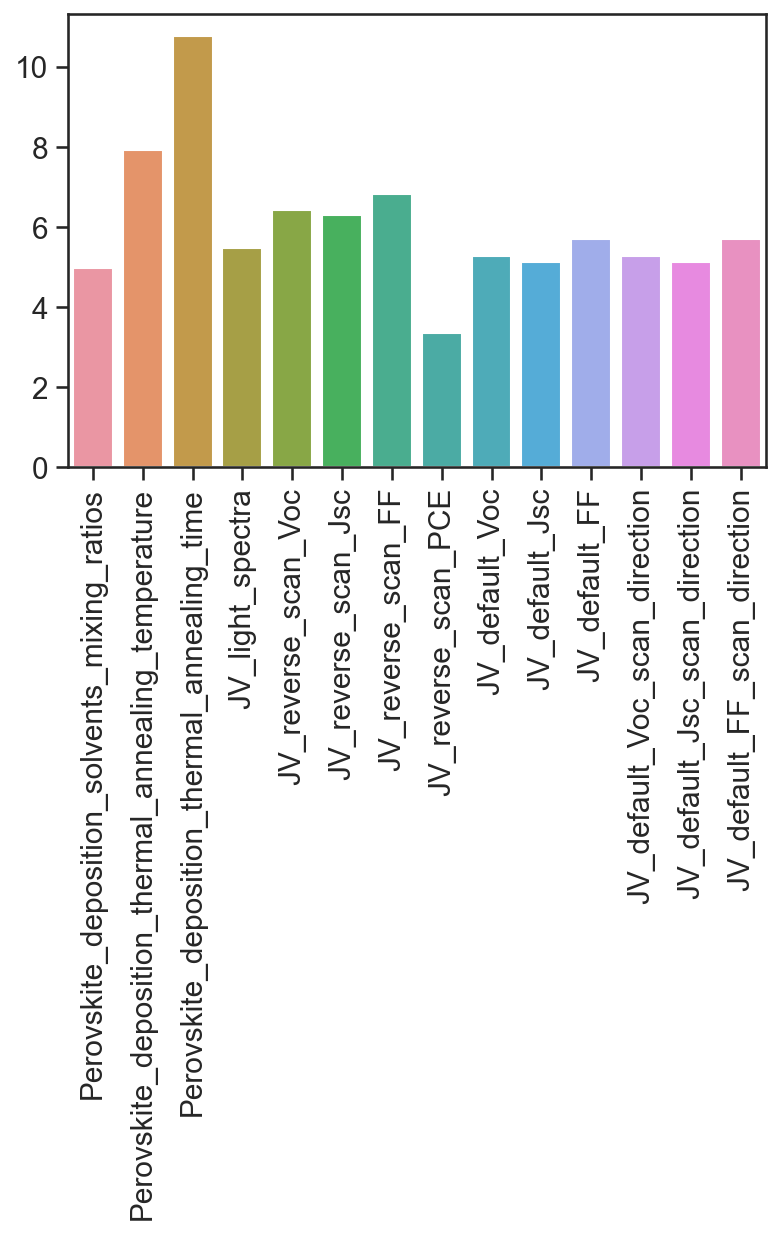

In [763]:
sns.barplot(y = investigation_values , x=investigation_columns)
plt.xticks(rotation=90)

In [761]:
df_for_ML_test = df_for_ML_test.drop('Backcontact_thickness_list', axis=1)

In [764]:
df_for_ML_test['JV_light_spectra'].unique()

array(['AM 1.5', nan, 'Indoor light', 'Monochromatic', 'Am 1.5'],
      dtype=object)

In [767]:
df_for_ML_test['JV_light_spectra'] = df_for_ML_test['JV_light_spectra'].replace('AM 1.5', 'Am 1.5')

In [768]:
df_for_ML_test['JV_light_spectra'].unique()

array(['Am 1.5', nan, 'Indoor light', 'Monochromatic'], dtype=object)

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [771]:
len(df_for_ML_test.dropna())

16123

In [772]:
df_for_ML_cleaned = df_for_ML_test.dropna()

In [775]:
np.sum(df_for_ML_cleaned.isna()).sort_values()

Cell_stack_sequence                                     0
JV_light_masked_cell                                    0
JV_light_wavelength_range                               0
JV_light_spectra                                        0
JV_light_intensity                                      0
                                                       ..
Perovskite_composition_a_ions_coefficients              0
Perovskite_composition_a_ions                           0
Perovskite_composition_perovskite_inspired_structure    0
Perovskite_composition_short_form                       0
Approx_band_gap                                         0
Length: 79, dtype: int64

In [877]:
len(df_for_ML_cleaned.columns)

51

In [881]:
df_for_ML_cleaned.to_csv(savepath + '/df_for_ML_cleaned_reduced.csv')

In [874]:
for column in df_for_ML_cleaned.columns:
    print(f'{column} {len(df_for_ML_cleaned[column].unique())}')

Cell_area_measured 250
Cell_number_of_cells_per_substrate 3
Cell_architecture 2
Cell_flexible 2
Cell_semitransparent 2
Cell_semitransparent_wavelength_range 1
ETL_stack_sequence 7
Perovskite_single_crystal 2
Perovskite_dimension_0D 2
Perovskite_dimension_2D 2
Perovskite_dimension_2D3D_mixture 2
Perovskite_dimension_3D 2
Perovskite_dimension_3D_with_2D_capping_layer 2
Perovskite_dimension_list_of_layers 8
Perovskite_composition_perovskite_ABC3_structure 2
Perovskite_composition_perovskite_inspired_structure 2
Perovskite_composition_short_form 71
Perovskite_composition_inorganic 2
Perovskite_composition_leadfree 2
Perovskite_band_gap_graded 2
Perovskite_deposition_number_of_deposition_steps 6
Perovskite_deposition_procedure 3
Perovskite_deposition_solvents 153
Perovskite_deposition_quenching_induced_crystallisation 2
Perovskite_deposition_thermal_annealing_temperature 403
Perovskite_deposition_thermal_annealing_time 452
Perovskite_deposition_solvent_annealing 2
HTL_stack_sequence 8
Add_l

In [873]:
df_for_ML_cleaned = df_for_ML_cleaned.drop('Perovskite_deposition_solvents_mixing_ratios', axis=1)

In [840]:
# df_for_ML_cleaned['Perovskite_deposition_procedure'].loc[df_for_ML_cleaned['Perovskite_deposition_procedure'].str.contains("Evap")]='Evaporation'

/var/folders/r6/9zxzvdfj4bd1nq9d_vmy3mgw0000gn/T/ipykernel_98221/1349426909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_ML_cleaned['Perovskite_deposition_procedure'].loc[df_for_ML_cleaned['Perovskite_deposition_procedure'].str.contains("Evap")]='Evaporation'


In [865]:
df_for_ML_cleaned['JV_light_spectra'].value_counts()

Am 1.5    15374
Name: JV_light_spectra, dtype: int64

In [858]:
df_for_ML_cleaned = df_for_ML_cleaned.loc[df_for_ML_cleaned['JV_light_intensity']==100.000000]

In [846]:
len(df_for_ML_cleaned)

15522

In [844]:
deposition_list = ['Spincoating', 'Co-evaporation', 'Evaporation']

In [845]:
df_for_ML_cleaned = df_for_ML_cleaned.loc[df_for_ML_cleaned['Perovskite_deposition_procedure'].isin(deposition_list)]

In [880]:
df_for_ML_cleaned['Cell_area_measured'].value_counts()


0.100    4831
0.090    2179
0.160    1322
0.040     764
0.120     616
         ... 
0.561       1
5.020       1
0.058       1
0.013       1
0.984       1
Name: Cell_area_measured, Length: 250, dtype: int64